In [65]:
import pandas as pd
from shapely.geometry import Polygon, Point
import matplotlib.pyplot as plt
%matplotlib inline

In [52]:
df_insalub = pd.read_csv('D:\\UTSEUS\\visualization\\Projet\\Map\\arretesinsalubriteparis2010.csv')
df_insalub = df_insalub[['Numéro Arrêté', 'geo_coordinates']]
df_insalub

,Numéro Arrêté,geo_coordinates
0,331,"48.88818, 2.35356"
1,231,"48.893253, 2.36167"
2,256,"48.871551, 2.378569"
3,396,"48.87295, 2.380344"
4,311,"48.871551, 2.378569"
5,234,"48.873209, 2.391212"
6,347,"48.884492, 2.352327"
7,397,"48.87295, 2.380344"
8,438,"35.292455, -93.729909"
9,332,"48.88818, 2.35356"


In [53]:
df_insalub[['latitude', 'longitude']] = df_insalub.geo_coordinates.str.split(',', expand=True)
df_insalub = df_insalub[['Numéro Arrêté', 'longitude', 'latitude']]
df_insalub['longitude'] = df_insalub['longitude'].astype(float)
df_insalub['latitude'] = df_insalub['latitude'].astype(float)

C:\Users\PC DE JEMARCO\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\PC DE JEMARCO\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


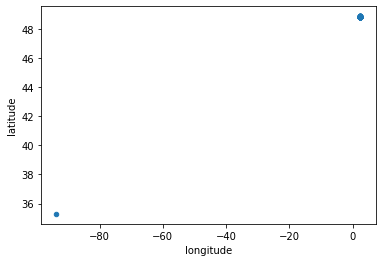

In [54]:
df_insalub.plot.scatter(x='longitude', y='latitude')

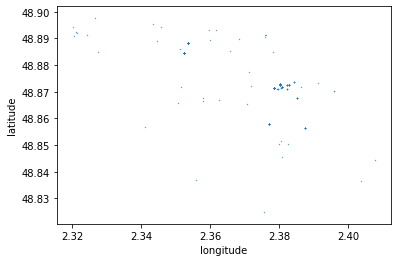

In [55]:
#Using the french bounding box should be anough
Fr_bounding_box=[-54.5247541978, 2.05338918702, 9.56001631027, 51.1485061713]
df_insalub = df_insalub[(df_insalub['longitude']<=Fr_bounding_box[2]) & (df_insalub['longitude']>=Fr_bounding_box[1]) & (df_insalub['latitude']<=Fr_bounding_box[3])& (df_insalub['latitude']>=Fr_bounding_box[0])]
df_insalub.plot.scatter(x='longitude', y='latitude', s=0.1)

In [56]:
df_insalub.to_csv('D:\\UTSEUS\\visualization\\Projet\\Map\\data carto\\cartomap_insalubrité.csv')

In [28]:
df_arr = pd.read_csv('D:\\UTSEUS\\visualization\\Projet\\Map\\arrondissements.csv')
df_arr

,N_SQ_AR,C_AR,C_ARINSEE,L_AR,L_AROFF,N_SQ_CO,SURFACE,PERIMETRE,Geometry X Y,Geometry,OBJECTID,LONGUEUR
0,750000014,14,75114,14ème Ardt,Observatoire,750001537,5.614877e+06,10317.483310,"48.8292445005, 2.3265420442","{""type"": ""Polygon"", ""coordinates"": [[[2.333806...",14,10316.720260
1,750000016,16,75116,16ème Ardt,Passy,750001537,1.637254e+07,17416.109660,"48.8603921054, 2.26197078836","{""type"": ""Polygon"", ""coordinates"": [[[2.274268...",16,17415.326730
2,750000011,11,75111,11ème Ardt,Popincourt,750001537,3.665442e+06,8282.011886,"48.8590592213, 2.3800583082","{""type"": ""Polygon"", ""coordinates"": [[[2.396236...",11,8281.635288
3,750000003,3,75103,3ème Ardt,Temple,750001537,1.170883e+06,4519.263648,"48.86287238, 2.3600009859","{""type"": ""Polygon"", ""coordinates"": [[[2.363828...",3,4519.071982
4,750000012,12,75112,12ème Ardt,Reuilly,750001537,1.631478e+07,24089.666300,"48.8349743815, 2.42132490078","{""type"": ""Polygon"", ""coordinates"": [[[2.413879...",12,24088.038920
5,750000001,1,75101,1er Ardt,Louvre,750001537,1.824613e+06,6054.936862,"48.8625627018, 2.33644336205","{""type"": ""Polygon"", ""coordinates"": [[[2.328007...",1,6054.680862
6,750000010,10,75110,10ème Ardt,Entrepôt,750001537,2.891739e+06,6739.375055,"48.8761300365, 2.36072848785","{""type"": ""Polygon"", ""coordinates"": [[[2.364685...",10,6739.168359
7,750000015,15,75115,15ème Ardt,Vaugirard,750001537,8.494994e+06,13678.798310,"48.8400853759, 2.29282582242","{""type"": ""Polygon"", ""coordinates"": [[[2.299322...",15,13677.923660
8,750000002,2,75102,2ème Ardt,Bourse,750001537,9.911537e+05,4554.104360,"48.8682792225, 2.34280254689","{""type"": ""Polygon"", ""coordinates"": [[[2.351518...",2,4553.938764
9,750000004,4,75104,4ème Ardt,Hôtel-de-Ville,750001537,1.600586e+06,5420.908434,"48.8543414263, 2.35762962032","{""type"": ""Polygon"", ""coordinates"": [[[2.368512...",4,5420.636779


In [29]:
#Points = df_arr.iloc[0,9]

def df_to_points(Points):
    Points = Points.split(': [')[1].strip()
    Points = Points.split(']}')[0].strip()
    Points = Points.replace('[', '')
    Points = Points.replace(']', '')
    Points2 = Points.strip(', ').split(', ')
    new_list = []
    for item in Points2:
        new_list.append(float(item))
    new_list
    new_list2 = []
    for i in range (len(new_list)):
        if i%2 != 0:
            new_list2.append((new_list[i-1],new_list[i]))
    return(new_list2)

In [30]:
liste = []
nb_arr = []
new_df_arr = []

for i in range (len(df_arr)):
    poly = Polygon(df_to_points(df_arr.iloc[i,9]))
    liste.append(poly)
    nb_arr.append(df_arr.iloc[i,10])

data = {'geometry': liste, 'arrondissement': nb_arr }
new_df_arr = pd.DataFrame(data)
new_df_arr

,geometry,arrondissement
0,"POLYGON ((2.333806501627019 48.84060921979981,...",14
1,"POLYGON ((2.274268195957375 48.87836539314277,...",16
2,"POLYGON ((2.396236576309829 48.85415458748719,...",11
3,"POLYGON ((2.363828096062925 48.86750443060333,...",3
4,"POLYGON ((2.413879624300607 48.83357143972265,...",12
5,"POLYGON ((2.328007329038849 48.86991742140715,...",1
6,"POLYGON ((2.364685889119478 48.88436904340794,...",10
7,"POLYGON ((2.299322310264648 48.85217442733327,...",15
8,"POLYGON ((2.351518483670821 48.8644258050741, ...",2
9,"POLYGON ((2.368512371393433 48.85573412813671,...",4


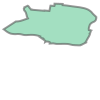

In [31]:
#le 12th arrondissement isnt displayed on carto.com and the shape doesnt looks like the one on the map
new_df_arr.iloc[4,0]

In [32]:
new_df_arr.to_csv('D:\\UTSEUS\\visualization\\Projet\\Map\\data carto\\cartomap_arrondissements.csv')

In [62]:
df_loyers = pd.read_csv('D:\\UTSEUS\\visualization\\Projet\\Map\\logement-encadrement-des-loyers.csv')
df_loyers

,Secteurs géographiques,Numéro du quartier,Nom du quartier,Nombre de pièces principales,Epoque de construction,Type de location,Loyers de référence,Loyers de référence majorés,Loyers de référence minorés,Année,Ville,Numéro INSEE du quartier,geo_shape,geo_point_2d
0,3,32,Europe,3,1946-1970,non meublé,24.8,29.8,17.4,2017,PARIS,7510832,"{""type"": ""Polygon"", ""coordinates"": [[[2.312293...","48.8781476759, 2.3171746113"
1,3,32,Europe,4,1946-1970,non meublé,24.1,28.9,16.9,2017,PARIS,7510832,"{""type"": ""Polygon"", ""coordinates"": [[[2.312293...","48.8781476759, 2.3171746113"
2,5,33,Saint-Georges,3,Apres 1990,meublé,27.0,32.4,18.9,2017,PARIS,7510933,"{""type"": ""Polygon"", ""coordinates"": [[[2.339228...","48.8799343388, 2.33285019656"
3,2,34,Chaussée-d'Antin,1,1971-1990,non meublé,27.4,32.9,19.2,2017,PARIS,7510934,"{""type"": ""Polygon"", ""coordinates"": [[[2.335450...","48.8735473802, 2.33226886887"
4,2,34,Chaussée-d'Antin,3,1946-1970,non meublé,21.5,25.8,15.1,2017,PARIS,7510934,"{""type"": ""Polygon"", ""coordinates"": [[[2.335450...","48.8735473802, 2.33226886887"
5,2,34,Chaussée-d'Antin,3,1946-1970,meublé,24.3,29.2,17.0,2017,PARIS,7510934,"{""type"": ""Polygon"", ""coordinates"": [[[2.335450...","48.8735473802, 2.33226886887"
6,5,35,Faubourg-Montmartre,3,1971-1990,meublé,24.1,28.9,16.9,2017,PARIS,7510935,"{""type"": ""Polygon"", ""coordinates"": [[[2.340255...","48.8739346918, 2.34325257947"
7,5,35,Faubourg-Montmartre,4,1971-1990,non meublé,21.5,25.8,15.1,2017,PARIS,7510935,"{""type"": ""Polygon"", ""coordinates"": [[[2.340255...","48.8739346918, 2.34325257947"
8,5,36,Rochechouart,4,1971-1990,meublé,24.3,29.2,17.0,2017,PARIS,7510936,"{""type"": ""Polygon"", ""coordinates"": [[[2.349708...","48.8798119198, 2.344861291"
9,5,37,Saint-Vincent-de-Paul,2,1946-1970,non meublé,22.9,27.5,16.0,2017,PARIS,7511037,"{""type"": ""Polygon"", ""coordinates"": [[[2.360513...","48.8807352373, 2.35747081045"


In [63]:
df_loyers = df_loyers[['Loyers de référence', 'geo_point_2d']]
df_loyers[['latitude', 'longitude']] = df_loyers.geo_point_2d.str.split(',', expand=True)
df_loyers['longitude'] = df_loyers['longitude'].astype(float)
df_loyers['latitude'] = df_loyers['latitude'].astype(float)
df_loyers = df_loyers[['Loyers de référence', 'latitude', 'longitude']]
df_loyers

C:\Users\PC DE JEMARCO\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\PC DE JEMARCO\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,Loyers de référence,latitude,longitude
0,24.8,48.878148,2.317175
1,24.1,48.878148,2.317175
2,27.0,48.879934,2.332850
3,27.4,48.873547,2.332269
4,21.5,48.873547,2.332269
5,24.3,48.873547,2.332269
6,24.1,48.873935,2.343253
7,21.5,48.873935,2.343253
8,24.3,48.879812,2.344861
9,22.9,48.880735,2.357471


In [66]:
p0 = Point(df_loyers.iloc[0,2], df_loyers.iloc[0,1])
poly = new_df_arr.iloc[0,0]
p0.within(poly)

False

In [82]:
Average = []
for i in range (20):
    Average.append([0,0])

for j in range (len(new_df_arr)):
    c = 0
    for i in range (len(df_loyers)):
        p = Point(df_loyers.iloc[i,2], df_loyers.iloc[i,1])
        poly = new_df_arr.iloc[j,0]
        if p.within(poly):
            Average[j][0] = Average[j][0]+df_loyers.iloc[i,0]
            c+= 1
    Average[j][1] = c

[[3123.7000000000007, 128, 24.403906250000006],
 [3418.2999999999984, 128, 26.705468749999987],
 [3102.4000000000005, 128, 24.237500000000004],
 [3412.4000000000015, 128, 26.65937500000001],
 [1450.0, 64, 22.65625],
 [3475.6000000000004, 128, 27.153125000000003],
 [3107.4, 128, 24.2765625],
 [3222.799999999999, 128, 25.17812499999999],
 [3452.6000000000013, 128, 26.97343750000001],
 [3533.0, 128, 27.6015625],
 [3227.799999999999, 128, 25.21718749999999],
 [2881.2000000000003, 128, 22.509375000000002],
 [3551.2000000000003, 128, 27.743750000000002],
 [3280.4000000000015, 128, 25.62812500000001],
 [3024.9000000000015, 128, 23.63203125000001],
 [3626.3000000000006, 128, 28.330468750000005],
 [2695.6000000000013, 128, 21.05937500000001],
 [3352.5000000000014, 128, 26.19140625000001],
 [3785.6000000000017, 128, 29.575000000000014],
 [2794.4000000000005, 128, 21.831250000000004]]

In [83]:
Average_rent = []
for i in range (len(Average)):
    Average_rent.append(Average[i][0]/Average[i][1])
Average_rent

[24.403906250000006,
 26.705468749999987,
 24.237500000000004,
 26.65937500000001,
 22.65625,
 27.153125000000003,
 24.2765625,
 25.17812499999999,
 26.97343750000001,
 27.6015625,
 25.21718749999999,
 22.509375000000002,
 27.743750000000002,
 25.62812500000001,
 23.63203125000001,
 28.330468750000005,
 21.05937500000001,
 26.19140625000001,
 29.575000000000014,
 21.831250000000004]

In [87]:
df_rent = pd.DataFrame(Average_rent, columns = ['average_rent'])
Y = df_rent['average_rent']
Z = pd.DataFrame.copy(df_rent)
Z[Y < 22] = '1'
Z[Y >= 22] = '2'
Z[Y >= 24] = '3'
Z[Y >= 26] = '4'
Z[Y >= 28] = '5'
Z

,average_rent
0,3
1,4
2,3
3,4
4,2
5,4
6,3
7,3
8,4
9,4


In [93]:
new_df_arr['average_rent_category'] = Z['average_rent']

arrondissement = []
for i in range (len(new_df_arr)):
    arrondissement.append(str(new_df_arr.iloc[i,1])+'ème arr.')
    
new_df_arr[['arrondissement']] = arrondissement
new_df_arr

,geometry,arrondissement,average_rent_category
0,"POLYGON ((2.333806501627019 48.84060921979981,...",14ème arr.,3
1,"POLYGON ((2.274268195957375 48.87836539314277,...",16ème arr.,4
2,"POLYGON ((2.396236576309829 48.85415458748719,...",11ème arr.,3
3,"POLYGON ((2.363828096062925 48.86750443060333,...",3ème arr.,4
4,"POLYGON ((2.413879624300607 48.83357143972265,...",12ème arr.,2
5,"POLYGON ((2.328007329038849 48.86991742140715,...",1ème arr.,4
6,"POLYGON ((2.364685889119478 48.88436904340794,...",10ème arr.,3
7,"POLYGON ((2.299322310264648 48.85217442733327,...",15ème arr.,3
8,"POLYGON ((2.351518483670821 48.8644258050741, ...",2ème arr.,4
9,"POLYGON ((2.368512371393433 48.85573412813671,...",4ème arr.,4


In [94]:
new_df_arr.to_csv('D:\\UTSEUS\\visualization\\Projet\\Map\\data carto\\cartomap_arrondissements.csv')